# Predicting COVID-19 from Chest X-Ray Images

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
# pip3 show tensorflow

### Loading the dateset

In [3]:
!git clone https://github.com/RishitToteja/Chext-X-ray-Images-Data-Set.git

Cloning into 'Chext-X-ray-Images-Data-Set'...
remote: Enumerating objects: 2319, done.
remote: Total 2319 (delta 0), reused 0 (delta 0), pack-reused 2319
Receiving objects: 100% (2319/2319), 1.31 GiB | 37.98 MiB/s, done.
Updating files: 100% (2296/2296), done.


In [4]:
import os

main_dir = "/content/Chext-X-ray-Images-Data-Set/DataSet/Data"

# SETTING TRAIN AND TEST DIRECTORY
train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "test")

#SETING DIRECTORY FOR COVID AND NORMAL IMAGES DIRECTORY
train_covid_dir = os.path.join(train_dir, "COVID19")
train_normal_dir = os.path.join(train_dir, "NORMAL")

test_covid_dir = os.path.join(test_dir, "COVID19")
test_normal_dir = os.path.join(test_dir, "NORMAL")


In [5]:
# MAKING SEPERATE FILES : 
train_covid_names = os.listdir(train_covid_dir)
train_normal_names = os.listdir(train_normal_dir)

test_covid_names = os.listdir(test_covid_dir)
test_normal_names = os.listdir(test_normal_dir)

### Data visualization

['/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(291).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID-19 (196).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(244).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID-19 (192).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(418).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(246).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(267).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/COVID19/COVID19(313).jpg']
['/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/NORMAL/NORMAL(890).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/NORMAL/NORMAL(986).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/NORMAL/NORMAL(1481).jpg', '/content/Chext-X-ray-Images-Data-Set/DataSet/Data/train/NORMAL/NORMAL(903)

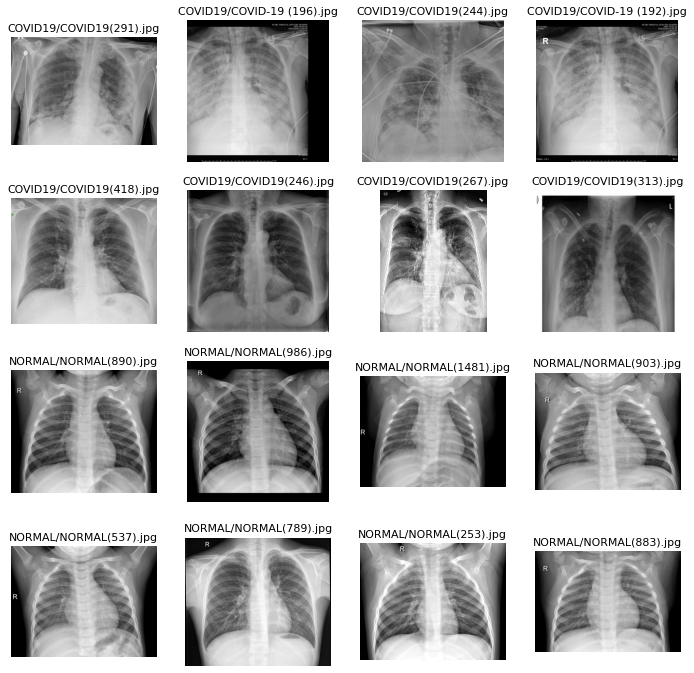

In [6]:
import matplotlib.image as mpimg

rows = 4
columns = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

covid_img = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_img = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

print(covid_img)
print(normal_img)

merged_img = covid_img + normal_img

for i, img_path in enumerate(merged_img):
    title = img_path.split("/", 6)[6]
    plot = plt.subplot(rows, columns, i+1)
    plot.axis("Off")
    img = mpimg.imread(img_path)
    plot.set_title(title, fontsize = 11)
    plt.imshow(img, cmap= "gray")

plt.show()

## Preprocessing data and data augmentation

In [7]:
# CREATING TRAINING, TESTING AND VALIDATION BATCHES

dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255,
                                     )

dgen_test = ImageDataGenerator(rescale = 1./255,
                              )

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150), 
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size = (150, 150), 
                                                      subset = "validation", 
                                                      batch_size = 32, 
                                                      class_mode = "binary")
test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size = (150, 150), 
                                               batch_size = 32, 
                                               class_mode = "binary")




Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [8]:
print("Class Labels are: ", train_generator.class_indices)
print("Image shape is : ", train_generator.image_shape)

Class Labels are:  {'COVID19': 0, 'NORMAL': 1}
Image shape is :  (150, 150, 3)


## Building Model Structure

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

# 1) CONVOLUTIONAL LAYER - 1
model.add(Conv2D(32, (5,5), padding = "same", activation = "relu", input_shape = train_generator.image_shape))

# 2) POOLING LAYER - 1
model.add(MaxPooling2D(pool_size=(2,2)))

# 3) DROPOUT LAYER -2
model.add(Dropout(0.5))

# 4) CONVOLUTIONAL LAYER - 2
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu"))

# 5) POOLING LAYER - 2
model.add(MaxPooling2D(pool_size=(2,2)))

# 6) DROPOUT LAYER - 2
model.add(Dropout(0.5))

# 7) FLATTENING LAYER TO 2D SHAPE
model.add(Flatten())

# 8) ADDING A DENSE LAYER
model.add(Dense(256, activation = 'relu'))

# 9 DROPOUT LAYER - 3
model.add(Dropout(0.5))

# 10) FINAL OUTPUT LAYER
model.add(Dense(1, activation = 'sigmoid'))

### PRINTING MODEL SUMMARY
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

### Model Training 

In [10]:
# COMPILING THE MODEL
LEARNING_RATE = 1e-04
EPOCHS = 30
model.compile(Adam(learning_rate = LEARNING_RATE), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
# TRAINING THE MODEL
history = model.fit(train_generator, 
                    epochs = EPOCHS, 
                    validation_data = validation_generator)

Epoch 1/30
46/46 [==============================] - 58s 1s/step - loss: 0.5634 - accuracy: 0.7729 - val_loss: 0.4209 - val_accuracy: 0.8702
Epoch 2/30
46/46 [==============================] - 48s 1s/step - loss: 0.3154 - accuracy: 0.8723 - val_loss: 0.3557 - val_accuracy: 0.8812
Epoch 3/30
46/46 [==============================] - 48s 1s/step - loss: 0.2651 - accuracy: 0.8972 - val_loss: 0.3013 - val_accuracy: 0.9586
Epoch 4/30
46/46 [==============================] - 49s 1s/step - loss: 0.1942 - accuracy: 0.9379 - val_loss: 0.2408 - val_accuracy: 0.9558
Epoch 5/30
46/46 [==============================] - 48s 1s/step - loss: 0.2154 - accuracy: 0.9234 - val_loss: 0.2314 - val_accuracy: 0.9530
Epoch 6/30
46/46 [==============================] - 50s 1s/step - loss: 0.1862 - accuracy: 0.9310 - val_loss: 0.2340 - val_accuracy: 0.9448
Epoch 7/30
46/46 [==============================] - 48s 1s/step - loss: 0.1716 - accuracy: 0.9386 - val_loss: 0.2110 - val_accuracy: 0.9586
Epoch 8/30
46/46 [==

## Model Evaluation


In [12]:
# KEYS OF HISTORY OBJECT
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

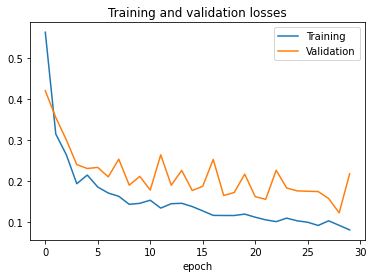

In [13]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

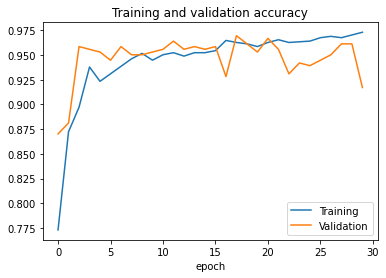

In [14]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [15]:
# GETTING TEST ACCURACY AND LOSS

test_loss, test_acc = model.evaluate(test_generator)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

16/16 [==============================] - 10s 600ms/step - loss: 0.1695 - accuracy: 0.9504
Test Set Loss :  0.16947142779827118
Test Set Accuracy :  0.9504132270812988


## Save the trained model

In [16]:
model.save("model.h5")

## Loading the saved model

In [2]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

## Testing the model

In [7]:
from tensorflow.keras.utils import img_to_array
from keras.preprocessing import image

In [18]:
filename = "test-image.png"
img_path = filename

img = tf.keras.utils.load_img(img_path, target_size = (150,150))
image_array = img_to_array(img)
image_array = tf.expand_dims(image_array, axis = 0)
prediction = new_model.predict(image_array)

if prediction == 0:
    print("The X-Ray is COVID-19 Positive")
else:
    print("The X-Ray is COVID-19 Negative")

1/1 [==============================] - 0s 47ms/step
The X-Ray is COVID-19 Negative


In [ ]:
# pip3 show tensorflow
# Name: tensorflow
# Version: 2.11.0